# A GUIDE TO THIS NOTEBOOK
#### This notebook includes some of my trials to enhance the accuracy. I tried to make the steps as clear and defined as possible.
#### The Champion Model (Model with the highest performance) is already sent to the submit_sol() func at the end of this notebook.
#### However, in order for to be able to re-train it while saving time, I commented all other models fitting trials. SO you can just run the entire notebook and submit the predictions_for_submissions.csv file

## Import necessary packages

In [23]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours 

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

## Data Exploration

In [2]:
df = pd.read_csv('traindata.csv')
df.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,...,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,...,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,...,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [3]:
df.describe()

,ID,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
count,23002.000000,23002.000000,2.300200e+04,2.300200e+04,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,...,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000
mean,11500.500000,307.196896,2.588955e+04,3.588139e+03,0.000087,0.024259,0.000043,0.199113,0.001174,0.386532,...,0.511856,0.084503,0.147974,0.031739,0.293264,0.287243,0.119363,0.120072,19.467220,0.478263
std,6640.249782,2697.345784,2.522555e+06,9.231127e+04,0.009324,0.262794,0.006594,2.167079,0.046141,0.486965,...,0.448993,0.189916,0.309429,0.111354,0.448771,0.449637,0.307603,0.319011,2.331899,0.499538
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5750.250000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,11500.500000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.460000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,17250.750000,0.000000,2.747500e+02,4.860000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,23001.000000,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           23002 non-null  int64  
 1   duration                     23002 non-null  int64  
 2   protocol_type                23002 non-null  object 
 3   service                      23002 non-null  object 
 4   flag                         23002 non-null  object 
 5   src_bytes                    23002 non-null  int64  
 6   dst_bytes                    23002 non-null  int64  
 7   land                         23002 non-null  int64  
 8   wrong_fragment               23002 non-null  int64  
 9   urgent                       23002 non-null  int64  
 10  hot                          23002 non-null  int64  
 11  num_failed_logins            23002 non-null  int64  
 12  logged_in                    23002 non-null  int64  
 13  num_compromised 

In [10]:
# Check class imbalance
df['Class'].value_counts()

0    12001
1    11001
Name: Class, dtype: int64

/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

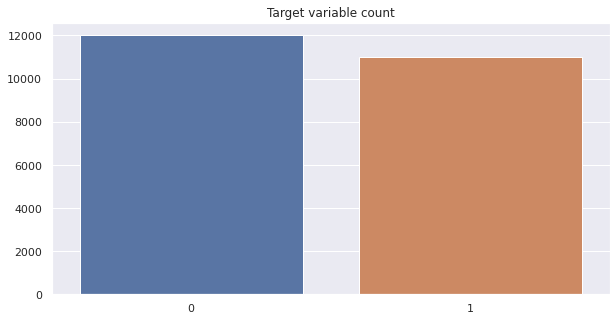

In [11]:
x=df['Class'].value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1],x)
plt.title('Target variable count')

In [6]:
df.protocol_type.value_counts() , df.service.value_counts(), df.flag.value_counts()

(tcp     18740
 udp      2725
 icmp     1537
 Name: protocol_type, dtype: int64,
 http         7124
 private      4069
 domain_u     1637
 smtp         1313
 ftp_data     1268
              ... 
 urh_i           4
 red_i           3
 pm_dump         3
 http_8001       1
 tim_i           1
 Name: service, Length: 66, dtype: int64,
 SF        13471
 S0         6566
 REJ        2042
 RSTR        462
 RSTO        282
 S1           81
 SH           42
 RSTOS0       20
 S2           19
 S3           13
 OTH           4
 Name: flag, dtype: int64)

#### Next block ref: [link](https://stackoverflow.com/questions/65981361/seaborn-heatmap-display-the-heatmap-only-if-values-are-above-given-threshold)


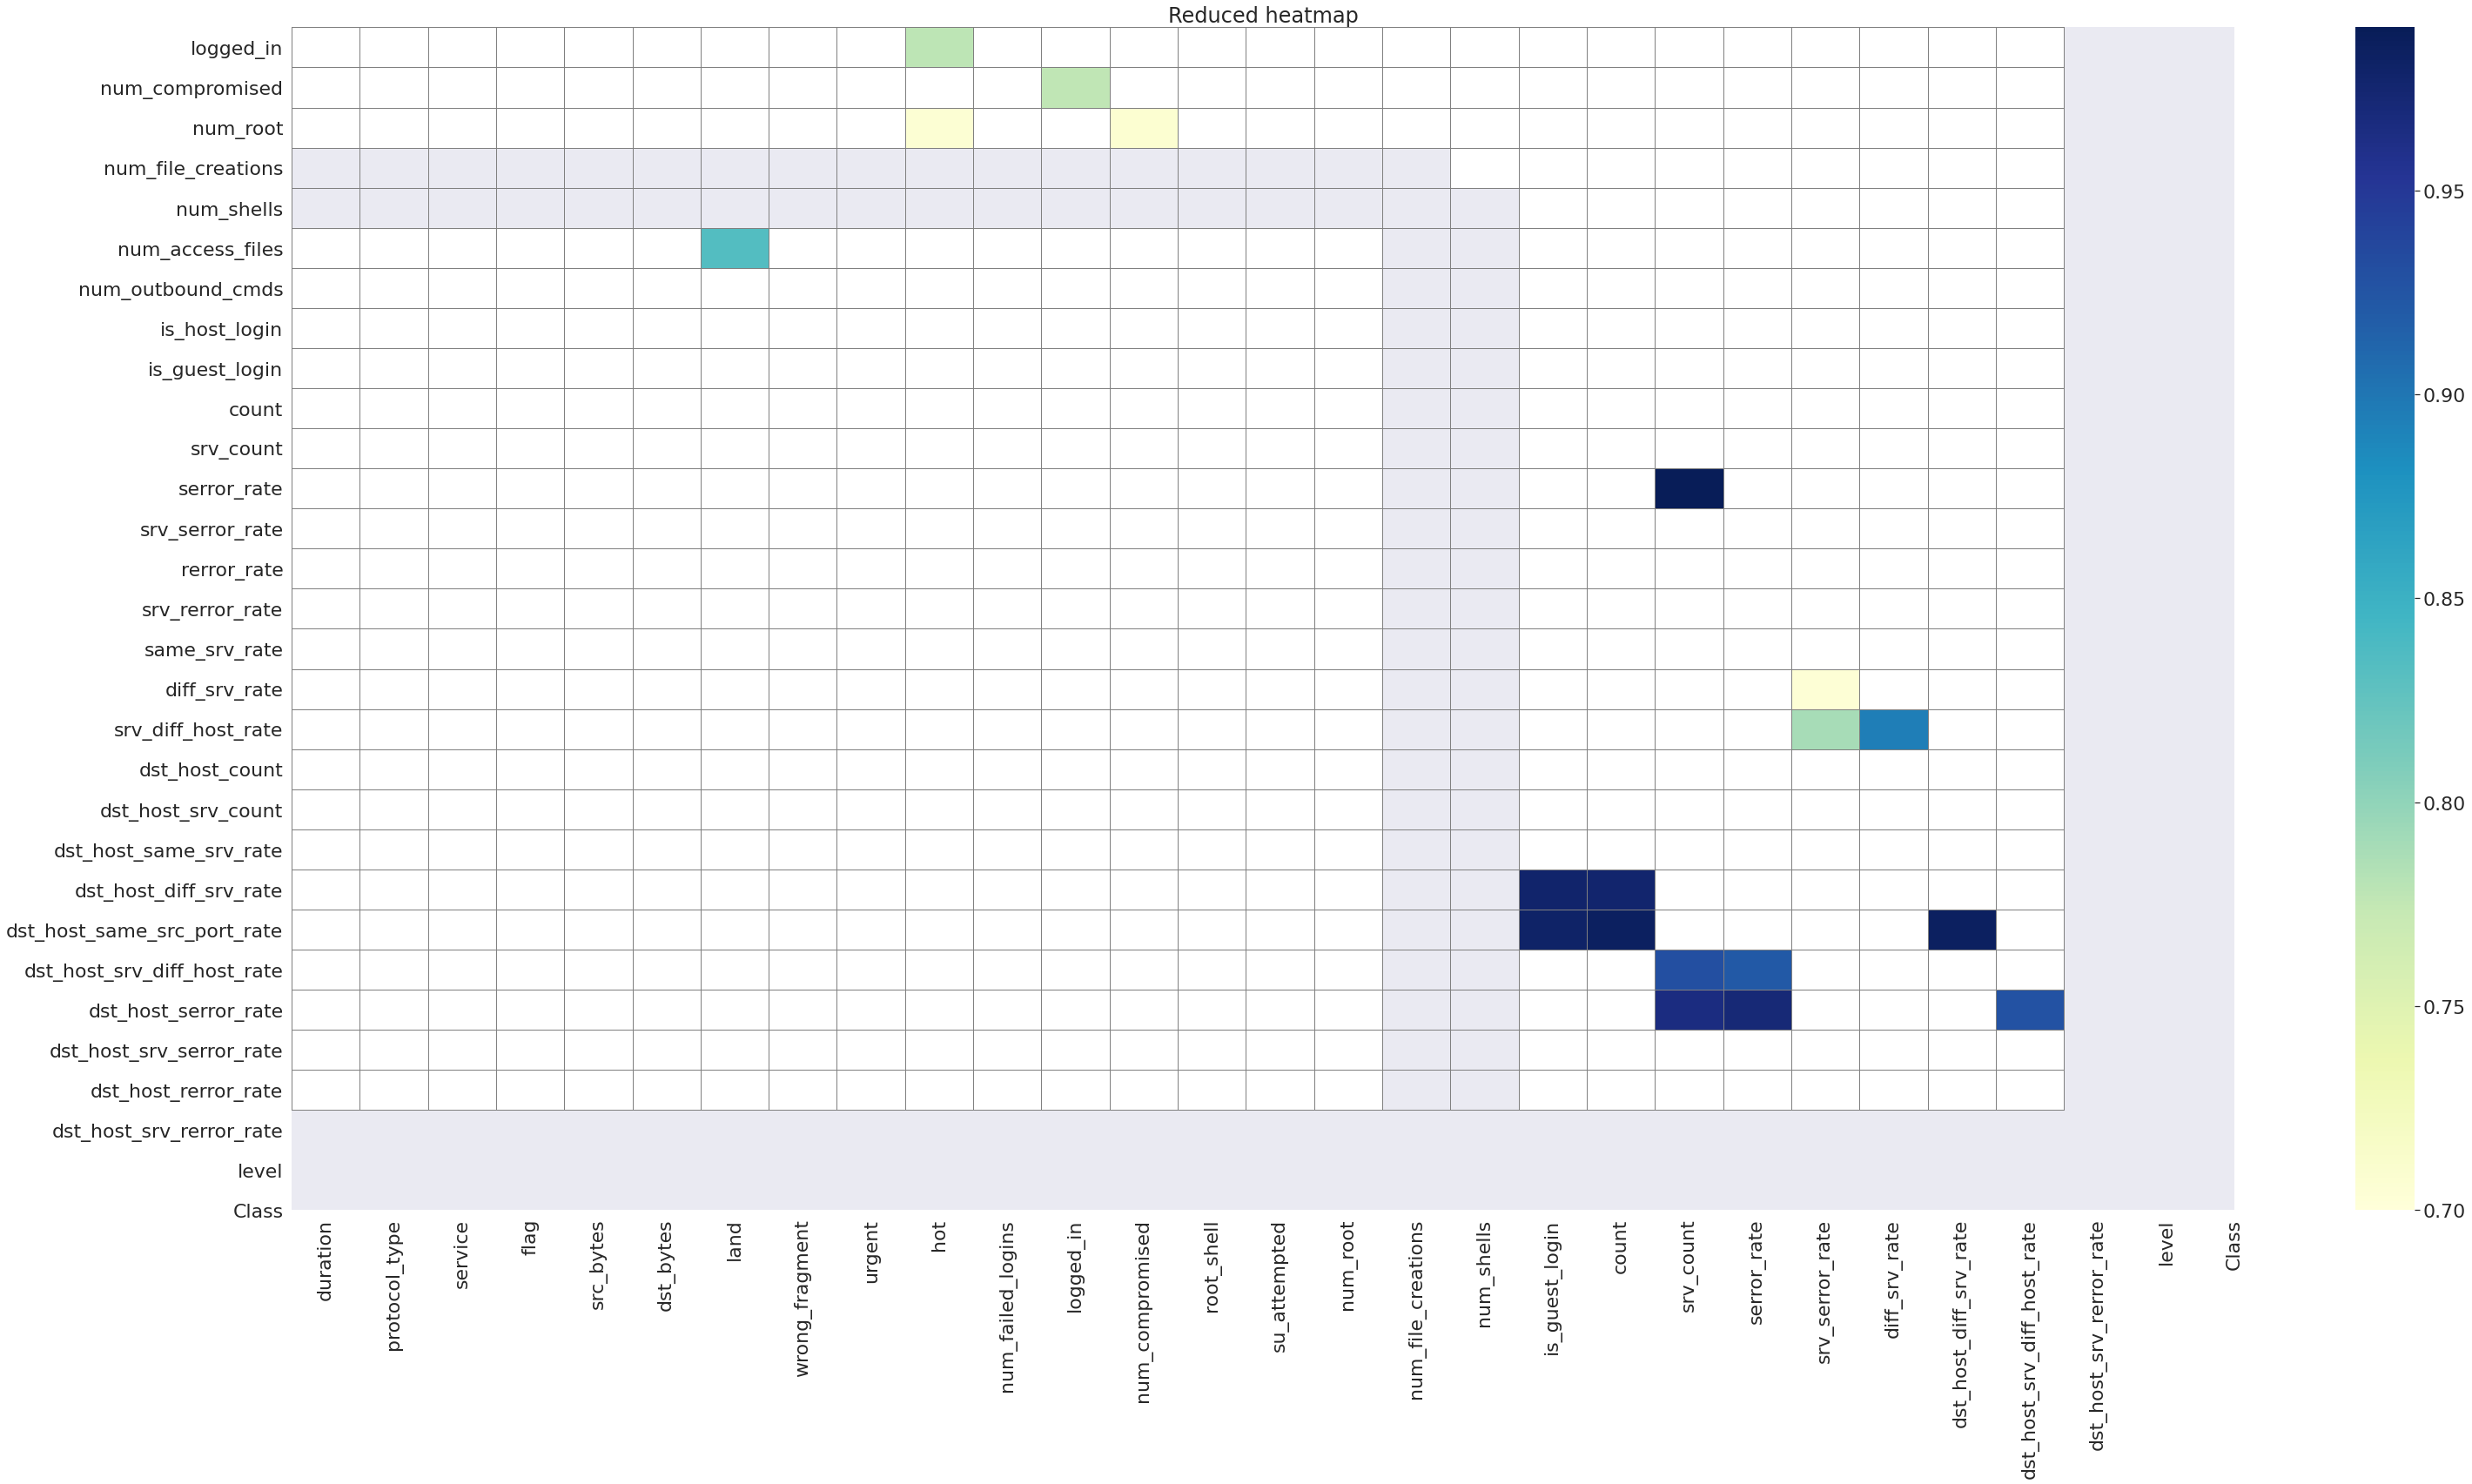

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy



labels = list(df.drop(['ID'], axis=1).columns)
corr = df.drop(['ID'], axis=1).corr()

#conditions for filtering 0.6<=r<=0.9
val_min = 0.7
val_max = 0.99

#plotting starts here
sns.set(font_scale=2)

#define the colormap with clipping values
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

corr = np.tril(corr)

#delete columns where all elements do not fulfill the conditions
ind_x,  = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=0))
corr = np.delete(corr, ind_x, 1)
#update x labels
map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]
    
#now the same for rows 
ind_y, = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=1))
corr = np.delete(corr, ind_y, 0)
#update y labels
map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]

#plot heatmap
g2 = sns.heatmap(corr,
    xticklabels=map_labels_x,
    yticklabels=map_labels_y,
    vmin=val_min,
    vmax=val_max,
    cmap=my_cmap,
    linewidths=0.5,
    linecolor="grey"
     
                ) #, ax=ax2)

g2.set_title("Reduced heatmap")
sns.set(rc={'figure.figsize':(50,25)})
plt.show()


## things to exclude according to this:
# 'num_access_files' OR 'land'
# 'srv_diff_host_rate' OR 'diff_srv_rate'
# 'dst_host_diff_srv_rate' OR 'is_guest_login'
# 'dst_host_same_src_port_rate' OR 'is_guest_login'
# 'dst_host_diff_srv_rate' OR 'count'
# 'dst_host_same_src_port_rate' OR 'count'
# 'dst_host_srv_diff_host_rate' OR 'srv_count'
# 'dst_host_srv_diff_host_rate' OR 'serror_rate'
# 'dst_host_serror_rate' OR 'srv_count'
# 'dst_host_serror_rate' OR 'serror_rate'
# 'dst_host_same_src_port_rate' OR 'dst_host_diff_srv_rate'
# 'dst_host_serror_rate' OR 'dst_host_srv_diff_host_rate'

## Data Preprocessing Function

In [71]:
def preprocess (train_df, test_df):
    
    train_df_final = train_df.drop(['Class'], axis=1)
    data = pd.concat([train_df_final, test_df])
    print('after concat shape: ',data.shape)
    
    data.drop(['ID'], axis=1, inplace = True)
    
    # One Hot Encoding to handle categorical columns
    categorical_data = data.select_dtypes(include=[object])
    categorical_data_dummies = pd.get_dummies(categorical_data, columns=['protocol_type','service','flag'], prefix = ['protocol_type','service','flag'])
    print(categorical_data_dummies.shape)
    data.drop(['protocol_type','service','flag'], axis=1, inplace= True)
    data_OHE = pd.concat([data, categorical_data_dummies], axis=1)
    print('after OHE shape: ', data_OHE.shape)
    
    
#     np.set_printoptions(threshold=np.inf)
#     print(np.array(data_OHE.columns))
    # we only want:
        # protocol: all
        # service:  # http, ftp_data, tlnet
        # flag: # SF, REJ

        
## things to exclude according to heatmap:
# 'num_access_files' OR 'land'
# 'srv_diff_host_rate' OR 'diff_srv_rate'
# 'dst_host_diff_srv_rate' OR 'is_guest_login'
# 'dst_host_same_src_port_rate' OR 'is_guest_login'
# 'dst_host_diff_srv_rate' OR 'count'
# 'dst_host_same_src_port_rate' OR 'count'
# 'dst_host_srv_diff_host_rate' OR 'srv_count'
# 'dst_host_srv_diff_host_rate' OR 'serror_rate'
# 'dst_host_serror_rate' OR 'srv_count'
# 'dst_host_serror_rate' OR 'serror_rate'
# 'dst_host_same_src_port_rate' OR 'dst_host_diff_srv_rate'
# 'dst_host_serror_rate' OR 'dst_host_srv_diff_host_rate'
    
    data_OHE_select = data_OHE.drop(['service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp',
                                     'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard',
                                     'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i',
                                     'service_ecr_i', 'service_efs', 'service_exec', 'service_finger',
                                     'service_ftp',
                                     # 'service_ftp_data',
                                     'service_gopher', 'service_hostnames',
                                     #'service_http',
                                     'service_http_443', 'service_http_8001',
                                     'service_imap4',
                                     'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
                                     'service_link', 'service_login', 'service_mtp', 'service_name',
                                     'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
                                     'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
                                     'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3',
                                     'service_printer', 'service_private', 'service_red_i', 'service_remote_job',
                                     'service_rje', 'service_shell', 'service_smtp', 'service_sql_net',
                                     'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat',
                                     #'service_telnet',
                                     'service_tftp_u', 'service_tim_i', 'service_time', 
                                     'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path',
                                     'service_vmnet', 'service_whois',
                                     
                                     'flag_OTH', 
                                     #'flag_REJ',
                                     'flag_RSTO', 
                                     'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 
                                     #'flag_SF', 
                                     'flag_SH',
                                     
                        # high correlation
                                     'num_outbound_cmds', 'is_host_login',
                                     'num_root', 'dst_host_srv_count',
                                     
                                     
                                     'num_access_files', 'srv_diff_host_rate', 
                                     'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                                     'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                                      
                                     
                                     
                                     
                                     
                                     
                                     
#                                      'duration', 
#                                      'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
#                                      'num_failed_logins','logged_in','num_compromised','root_shell',
#                                      'su_attempted', 'num_file_creations', 'num_shells', 'is_guest_login', 'count',
#                                      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
#                                      'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
#                                      'dst_host_same_srv_rate', 'dst_host_srv_serror_rate',
#                                      'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level',
                                   #  'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
                                   #  'service_ftp_data', 'service_http', 'service_telnet', 
                                   #  'flag_REJ', 'flag_SF'
                                     
                                    ], axis=1)
    
    
    
#     np.set_printoptions(threshold=np.inf)
#     print(np.array(data_OHE_select.columns))
    
    train_df_final = data_OHE_select.iloc[:train_df.shape[0]]
    test_df_final = data_OHE_select.iloc[train_df.shape[0]:]
    
    # SCALER to scale numeric values
    # scaler = StandardScaler()
#     scaler = MinMaxScaler()
#     scaler = preprocessing.Normalizer() 
    
    scaler = RobustScaler()
    train_df_final = pd.DataFrame(scaler.fit_transform(train_df_final))
    test_df_final = pd.DataFrame(scaler.fit_transform(test_df_final))
    
    
    
    
#     final = scaled
#     print('After Scaling: ',final.shape)
    
    
    # PCA For dimensionality reductions
#     pca = PCA(n_components=3)
#     final = pca.fit_transform(final)
#     final = pd.DataFrame(final)
    
    
    
    
#     # isolation forest outlier detection
    
#     isolation_forest_clf = IsolationForest(random_state=0).fit(train_df_final)
#     isolation_forest_pred = isolation_forest_clf.predict(train_df_final)
#     train_df_final = train_df_final[isolation_forest_pred==1]
#     train_df= train_df[isolation_forest_pred==1]
    
#     print("After isolation X", train_df_final.shape)
#     print("After isolation y", (train_df.Class).shape)
    
    # further feature selection RFE
#     estimator = DecisionTreeClassifier()
#     selector = RFE(estimator, n_features_to_select=3, step=1)
#     selector = selector.fit(train_df_final, train_df.Class)
#     train_df_final = train_df_final.loc[:,selector.support_]
#     test_df_final = test_df_final.loc[:,selector.support_]
    

#     over sampling    
    smote = SMOTE()
    X_sm, y_sm = smote.fit_resample(train_df_final, train_df.Class)

    # under sampling
#     tomek = TomekLinks()
#     # transform the dataset
#     X_sm, y_sm = tomek.fit_resample(train_df_final, train_df.Class)
    
    
#     print('Resample output y: ', y_sm.value_counts())
#     print('Resample output X: ', X_sm.shape)
    
    
    # ENN to clean intersected classes
#     enn = EditedNearestNeighbours(n_neighbors=3)
#     # transform the dataset
#     X_sm, y_sm = enn.fit_resample(X_sm, y_sm)



    X_train_preprocessed = X_sm
    y_train_preprocessed = y_sm

#     X_train_preprocessed = train_df_final
#     y_train_preprocessed = train_df.Class
    
    return X_train_preprocessed, y_train_preprocessed, test_df_final
    
    

## Train Model Functions

In [72]:

def xgboost (X, y, X_train, y_train, X_test, y_test):
    
    print ("xgboost")
    param_dist = {'objective':'binary:logistic'}
    clf = xgb.XGBModel(**param_dist)
    clf.fit(X, y,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)  
    #print ("Accuracy: ",clf.evals_result())
    y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))
    clf.fit(X,y)
    print(25*"_")
    
    return clf

def xgboost2 (X, y, X_train, y_train, X_test, y_test):
    
    print ("xgboost2")
    # data_dmatrix = xgb.DMatrix(data=X,label=y)
#     xg_class = xgb.XGBClassifier(
#         objective ='binary:logistic', colsample_bytree = 0.9, learning_rate = 0.01,
#                 max_depth = 50, alpha = 5, n_estimators = 100,booster='gbtree', 
#                                  use_label_encoder=False, random_state=0)
#     xg_class = xgb.XGBClassifier(lr =0.1, pos_weight = 1000, subsample = 0.5)
    xg_class = xgb.XGBClassifier(objective ='binary:logistic',learning_rate = 0.001,colsample_bytree = 0.8,
                              max_depth = 10, alpha = 10, n_estimators = 50,scale_pos_weight=20)
    xg_class.fit(X_train,y_train)
    print(X_test.shape)
    
    preds = xg_class.predict(X_test)
    
    print("Train Accuracy: ", xg_class.score(X_train, y_train) )
    # print("Test Accuracy: " , xg_reg.score(X_test , y_test ) )
    
    print(classification_report(y_test, preds))
    xg_class.fit(X,y)
    print(25*"_")
    
    
    return xg_class

def randomforest (X, y, X_train, y_train, X_test, y_test):
    
    print ("randomforest")
    clf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf


def svmsvc (X, y, X_train, y_train, X_test, y_test):
    
    print ("svmsvc")
    clf = svm.SVC(max_iter=3000)
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf

def linearsvm (X, y, X_train, y_train, X_test, y_test):
    
    print ("linearsvm")
    clf = svm.LinearSVC(max_iter=5000)
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf


def gradientboostingclassifier (X, y, X_train, y_train, X_test, y_test):
    
    print ("gradientboostingclassifier")
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf

def logisticregression (X, y, X_train, y_train, X_test, y_test):
    
    print ("logisticregression")
    clf = LogisticRegression(max_iter=200,random_state=0, solver='lbfgs', multi_class='ovr')
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf

def mlp (X, y, X_train, y_train, X_test, y_test):
    
    print ("mlp")
    clf = MLPClassifier( random_state=0)
    clf.fit(X_train, y_train)
    print("Train Accuracy: ", clf.score(X_train, y_train) )
#     print("Test Accuracy: " , clf.score(X_test , y_test ) )
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    clf.fit(X, y)
    print(25*"_")
    
    return clf

## Action: Read, Preprocess, Train

In [73]:
train_df = pd.read_csv('traindata.csv')
test_df  = pd.read_csv('testdata.csv')
train_df.shape, test_df.shape

((23002, 44), (22501, 43))

In [74]:
X, y, test = preprocess(train_df, test_df)

after concat shape:  (45503, 43)
(45503, 81)
after OHE shape:  (45503, 120)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, shuffle=True)

In [24]:
# clf_xgboost = xgboost (X, y, X_train, y_train, X_test, y_test)
# clf_xgboost2 = xgboost2 (X, y, X_train, y_train, X_test, y_test)
# clf_randomforest = randomforest (X, y, X_train, y_train, X_test, y_test)
# clf_svmsvc = svmsvc (X, y, X_train, y_train, X_test, y_test)
# # clf_linearsvm = linearsvm (X, y, X_train, y_train, X_test, y_test)
# clf_gradientboostingclassifier = gradientboostingclassifier (X, y, X_train, y_train, X_test, y_test)
# clf_logisticregression = logisticregression (X, y, X_train, y_train, X_test, y_test)
# clf_mlp = mlp (X, y, X_train, y_train, X_test, y_test)

xgboost
[0]	validation_0-logloss:0.44314	validation_1-logloss:0.44356
[1]	validation_0-logloss:0.30414	validation_1-logloss:0.30478
[2]	validation_0-logloss:0.21653	validation_1-logloss:0.21745
[3]	validation_0-logloss:0.15776	validation_1-logloss:0.15847
[4]	validation_0-logloss:0.11720	validation_1-logloss:0.11814
[5]	validation_0-logloss:0.08701	validation_1-logloss:0.08782
[6]	validation_0-logloss:0.06520	validation_1-logloss:0.06603
[7]	validation_0-logloss:0.04919	validation_1-logloss:0.04989
[8]	validation_0-logloss:0.03755	validation_1-logloss:0.03849
[9]	validation_0-logloss:0.02852	validation_1-logloss:0.02974
[10]	validation_0-logloss:0.02216	validation_1-logloss:0.02335
[11]	validation_0-logloss:0.01737	validation_1-logloss:0.01826
[12]	validation_0-logloss:0.01364	validation_1-logloss:0.01452
[13]	validation_0-logloss:0.01079	validation_1-logloss:0.01166
[14]	validation_0-logloss:0.00872	validation_1-logloss:0.00963
[15]	validation_0-logloss:0.00703	validation_1-logloss:0.

/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(7201, 37)
Train Accuracy:  0.9882745074697935
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3587
           1       0.97      1.00      0.99      3614

    accuracy                           0.99      7201
   macro avg       0.99      0.99      0.99      7201
weighted avg       0.99      0.99      0.99      7201

[23:29:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


_________________________
randomforest
Train Accuracy:  0.9902981965359204
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3587
           1       0.99      0.98      0.99      3614

    accuracy                           0.99      7201
   macro avg       0.99      0.99      0.99      7201
weighted avg       0.99      0.99      0.99      7201

_________________________
svmsvc


/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Train Accuracy:  0.5049104219986905
              precision    recall  f1-score   support

           0       0.65      0.03      0.06      3587
           1       0.51      0.98      0.67      3614

    accuracy                           0.51      7201
   macro avg       0.58      0.51      0.37      7201
weighted avg       0.58      0.51      0.37      7201



/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


_________________________
gradientboostingclassifier
Train Accuracy:  0.997976310933873
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3587
           1       0.99      1.00      0.99      3614

    accuracy                           0.99      7201
   macro avg       0.99      0.99      0.99      7201
weighted avg       0.99      0.99      0.99      7201

_________________________
logisticregression


/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:  0.9208975656210939
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3587
           1       0.94      0.90      0.92      3614

    accuracy                           0.92      7201
   macro avg       0.92      0.92      0.92      7201
weighted avg       0.92      0.92      0.92      7201



/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_________________________
mlp
Train Accuracy:  0.9914290816022856
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3587
           1       0.99      0.99      0.99      3614

    accuracy                           0.99      7201
   macro avg       0.99      0.99      0.99      7201
weighted avg       0.99      0.99      0.99      7201

_________________________


In [79]:
dt_clf = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4).fit(X,y)

## Deep Learning Trials

In [98]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, AveragePooling1D

In [99]:
X_deep = np.array(X).reshape(X.shape[0], 1, X.shape[1])
y_deep = np.array(y).reshape(y.shape[0],1)
print(X_deep.shape, y_deep.shape)
print(X.shape, y.shape)

(24002, 1, 37) (24002, 1)
(24002, 37) (24002,)


In [100]:
model = Sequential()

model.add(Input(shape=(1, X.shape[1])))

model.add(Conv1D(filters=10, kernel_size=1,  activation='sigmoid', input_shape=(1, X.shape[1])))
model.add(AveragePooling1D(padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(64, 1))
model.add(LeakyReLU(alpha=0.05))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(128, 1))
model.add(LeakyReLU(alpha=0.05))
model.add(AveragePooling1D(padding='same'))

# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=1))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dense(10))

# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(10, kernel_initializer='normal', activation='relu'))

# model.add(LeakyReLU(alpha=0.05))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_deep, y_deep, epochs=10, batch_size=32)


Epoch 1/10
751/751 [==============================] - 76s 97ms/step - loss: 0.4789 - accuracy: 0.7796
Epoch 2/10
751/751 [==============================] - 73s 98ms/step - loss: 0.2315 - accuracy: 0.9232
Epoch 3/10
751/751 [==============================] - 70s 94ms/step - loss: 0.2029 - accuracy: 0.9354
Epoch 4/10
751/751 [==============================] - 73s 97ms/step - loss: 0.2018 - accuracy: 0.9391
Epoch 5/10
751/751 [==============================] - 76s 101ms/step - loss: 0.1821 - accuracy: 0.9474
Epoch 6/10
751/751 [==============================] - 74s 99ms/step - loss: 0.1815 - accuracy: 0.9483
Epoch 7/10
751/751 [==============================] - 70s 93ms/step - loss: 0.1763 - accuracy: 0.9496
Epoch 8/10
751/751 [==============================] - 63s 84ms/step - loss: 0.1665 - accuracy: 0.9512
Epoch 9/10
751/751 [==============================] - 74s 98ms/step - loss: 0.1743 - accuracy: 0.9484
Epoch 10/10
751/751 [==============================] - 73s 98ms/step - loss: 0.17

In [102]:
test_deep = np.array(test).reshape(test.shape[0], 1, test.shape[1])
predictions = model.predict(test_deep)
final_results = ((np.round(predictions)).squeeze()).astype(int)

### Train the model xgboost + k fold cross validation


In [25]:
class SaveBestModel(xgb.callback.TrainingCallback):
    def __init__(self, cvboosters):
        self._cvboosters = cvboosters
    
    def after_training(self, model):
        self._cvboosters[:] = [cvpack.bst for cvpack in model.cvfolds]
        return model

In [26]:
from xgboost import cv
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.8,'learning_rate': 0.001,
                'max_depth': 10, 'alpha': 10, 'scale_pos_weight':20}


cvboosters = []

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc",  seed=123, callbacks=[SaveBestModel(cvboosters), ])

In [28]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix_test = xgb.DMatrix(data=test)
# bst = xgb.train(dtrain=data_dmatrix, params=params, num_boost_round=50)

[23:30:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Stacking

In [94]:
estimators = [
    ('xg2', xgb.XGBClassifier(objective ='binary:logistic',learning_rate = 0.0001,colsample_bytree = 0.8,max_depth = 6, max_leaves=4, alpha = 10, n_estimators = 50,scale_neg_weight=50)),
    ('DT', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6))
    
]
stack_clf = StackingClassifier(
    estimators=estimators, final_estimator = LogisticRegression(class_weight= 'balanced', C = 0.55, random_state = 42, solver='newton-cg')
)
# stack_clf.fit(X, y)

/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:58] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:52:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:59] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:52:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:59] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:52:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:59] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:52:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:00] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:00] WARNING: ../src/learner.cc:541: 
Parameters: { scale_neg_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('xg2',
                                XGBClassifier(alpha=10, base_score=None,
                                              booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.0001,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=4,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraint...

## Hyper Parameter Tuning using Random Search

In [95]:
# from scipy import stats
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import f1_score

# clf_xgb = XGBClassifier(objective = 'binary:logistic')
# param_dist = {'n_estimators': stats.randint(150, 500),
#               'learning_rate': stats.uniform(0.01, 0.07),
#               'subsample': stats.uniform(0.3, 0.7),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': stats.uniform(0.5, 0.45),
#               'min_child_weight': [1, 2, 3]
#              }
# clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

# numFolds = 5
# folds = KFold(n_splits = numFolds, shuffle = True)

# estimators = []
# results = np.zeros(len(X))
# score = 0.0
# for train_index, test_index in folds.split(X):
#     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
#     clf.fit(X_train, y_train)

#     estimators.append(clf.best_estimator_)
#     results[test_index] = clf.predict(X_test)
#     score += f1_score(y_test, results[test_index])
# score /= numFolds

## Test The Model to Submit

In [96]:
import os
import numpy as np
import subprocess
def submit_soln (clf, file_name, submission_message = 'Trial ya rab' ):
    
    final_results = clf.predict(test)
    print(final_results[:5])
    print(final_results.shape)
    
    index = np.array (range(0,final_results.shape[0]) )
    to_be_stored = pd.DataFrame(np.transpose([index, final_results]))
    to_be_stored.to_csv(file_name, header=["ID", "Class"], index=False)
    command = f"kaggle competitions submit -c elg7186-assignment-1-is-this-an-intrusion -f {file_name} -m \"{submission_message}\""
    print(command)


In [97]:
test.columns = test.columns.map(int)
submit_soln  (dt_clf, file_name='predictions_for_submissions.csv', submission_message= "OHE+ManualFeatureSelection+Robust+SMOTE+STACKING" )

[1 1 0 0 1]
(22501,)
kaggle competitions submit -c elg7186-assignment-1-is-this-an-intrusion -f predictions_for_submissions.csv -m "OHE+ManualFeatureSelection+Robust+SMOTE+STACKING"
